In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
sns.set(font_scale=2) 
sns.set_style("ticks")

In [42]:
# return noisy linear model
def f(x, a, b, sigma):
    return a*x + b + np.random.normal(0, sigma, len(x))

In [52]:
# return noisy linear model
def f2(x, a, b, sigma):
    return np.random.normal(0, len(x), len(x))

In [53]:
x = np.arange(100)
y = f(x, 1, 10, 15)
data = np.array([x, y]).T

In [54]:
x2 = np.arange(100)
y2 = f2(x, 1, 10, 15)
data2 = np.array([x2, y2]).T

/Users/toni_brain/miniconda3/envs/MDA_ML_Workshop/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 125.0)

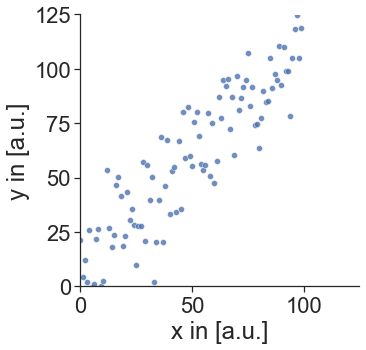

In [58]:
fig = plt.figure(figsize=(5,5))
sns.scatterplot(x, y, alpha=0.8)
sns.despine()
plt.xlabel('x in [a.u.]')
plt.ylabel('y in [a.u.]')
plt.xlim(0,125)
plt.ylim(0,125)

/var/folders/pn/jspyhkmj2rnfsxlpd3b5zdhw0000gn/T/ipykernel_42415/549325419.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  x, y = np.random.multivariate_normal(mean, cov, 500).T
/Users/toni_brain/miniconda3/envs/MDA_ML_Workshop/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'y in [a.u.]')

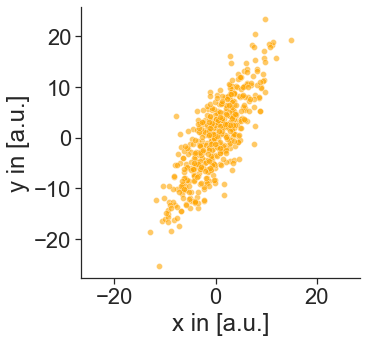

In [94]:
fig = plt.figure(figsize=(5,5))
mean = [0, 0]
cov = [[10, 30], [30, 50]]
x, y = np.random.multivariate_normal(mean, cov, 500).T
sns.scatterplot(x, y, alpha=0.6, color='orange')
plt.axis('equal')
sns.despine()
plt.xlabel('x in [a.u.]')
plt.ylabel('y in [a.u.]')

In [78]:
data = np.array([x, y]).T
pca = PCA(n_components=2)
pca.fit(data)

print("eigenvectors: ", pca.components_)
print("eigenvalues: ", pca.explained_variance_)

print(f'eigenvectors length: {np.linalg.norm(pca.components_[0])}, {np.linalg.norm(pca.components_[1])}')
print(f'eigenvectors angle: {np.rad2deg(np.arccos(np.dot(pca.components_[0], pca.components_[1])))}')

eigenvectors:  [[-0.46689619 -0.88431213]
 [ 0.88431213 -0.46689619]]
eigenvalues:  [63.00349523  6.47220059]
eigenvectors length: 1.0, 1.0
eigenvectors angle: 90.0


Text(0, 0.5, 'y in [a.u.]')

<Figure size 360x360 with 0 Axes>

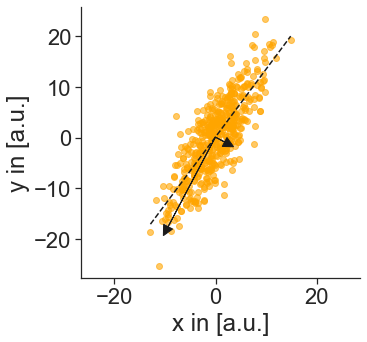

In [114]:
fig = plt.figure(figsize=(5,5))
scaling = 20
e1_x = pca.components_[0, 0]*pca.explained_variance_[0]
e1_y = pca.components_[0, 1]*pca.explained_variance_[0]
e2_x = pca.components_[1, 0]*pca.explained_variance_[1]
e2_y = pca.components_[1, 1]*pca.explained_variance_[1]

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.6, c='orange')
ax.arrow(np.mean(x), np.mean(y), e1_x/pca.explained_variance_[0]*scaling, e1_y/pca.explained_variance_[0]*scaling, head_width=2, head_length=2, fc='k', ec='k')
ax.arrow(np.mean(x), np.mean(y), e2_x/pca.explained_variance_[0]*scaling, e2_y/pca.explained_variance_[0]*scaling, head_width=2, head_length=2, fc='k', ec='k')
plt.plot(x_vals, y_vals, 'k--')
plt.axis('equal')
#ax.set_xlim(-25, 150)
#ax.set_ylim(-25, 150)
sns.despine()
plt.xlabel('x in [a.u.]')
plt.ylabel('y in [a.u.]')

In [98]:
import scipy.stats

In [100]:
reg = scipy.stats.linregress(x,y)

In [102]:
x_vals = np.linspace(x.min(),x.max(),10)
y_vals = x_vals*reg.slope +reg.intercept

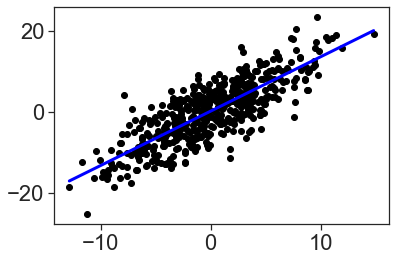

In [104]:

plt.scatter(x, y, color="black")
plt.plot(x_vals, y_vals, color="blue", linewidth=3)

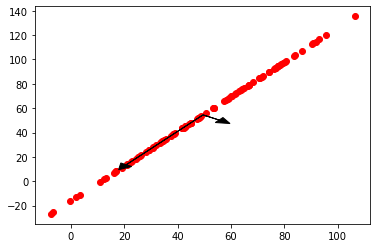

In [108]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(pca.components_[0, 0]*projection[:, 0]+np.mean(x), pca.components_[0, 1]*projection[:, 0] + np.mean(y), c="red")
ax.arrow(np.mean(x), np.mean(y), e1_x/pca.explained_variance_[0]*scaling, e1_y/pca.explained_variance_[0]*scaling, head_width=5, head_length=5, fc='k', ec='k')
ax.arrow(np.mean(x), np.mean(y), e2_x/pca.explained_variance_[0]*scaling, e2_y/pca.explained_variance_[0]*scaling, head_width=5, head_length=5, fc='k', ec='k')